In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install bioinfokit

In [82]:

import datetime 
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [83]:
df = pd.read_csv("mcdonalds.csv")

In [84]:
df.shape


(1453, 15)

In [85]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [86]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [88]:
df.duplicated().sum()

22

In [89]:
df.drop_duplicates()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [90]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [91]:
gender_counts = df.groupby('Gender').count()
visit_frequency_counts = df.groupby('VisitFrequency').count()
like_counts = df.groupby('Like').count()

print(gender_counts)
print(visit_frequency_counts)
print(like_counts)

        yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
Gender                                                                    
Female    788         788    788        788     788   788    788    788   
Male      665         665    665        665     665   665    665    665   

        expensive  healthy  disgusting  Like  Age  VisitFrequency  
Gender                                                             
Female        788      788         788   788  788             788  
Male          665      665         665   665  665             665  
                       yummy  convenient  spicy  fattening  greasy  fast  \
VisitFrequency                                                             
Every three months       342         342    342        342     342   342   
More than once a week     54          54     54         54      54    54   
Never                    131         131    131        131     131   131   
Once a month             439         439    439

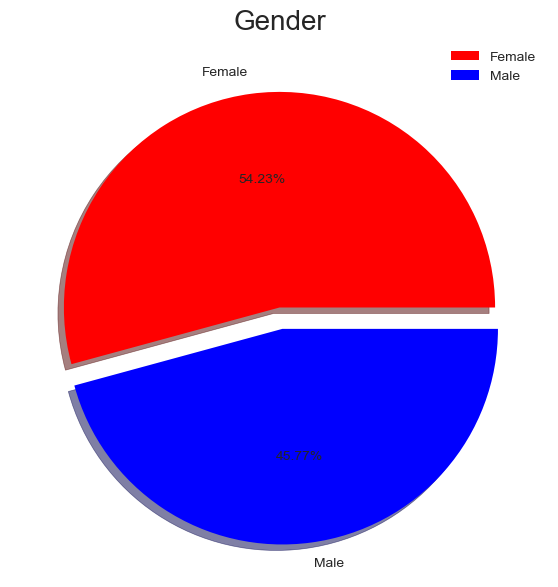

In [92]:
import matplotlib.pyplot as plt

labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'blue']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
ax.set_title('Gender', fontsize=20)
ax.axis('off')
ax.legend()

plt.show()

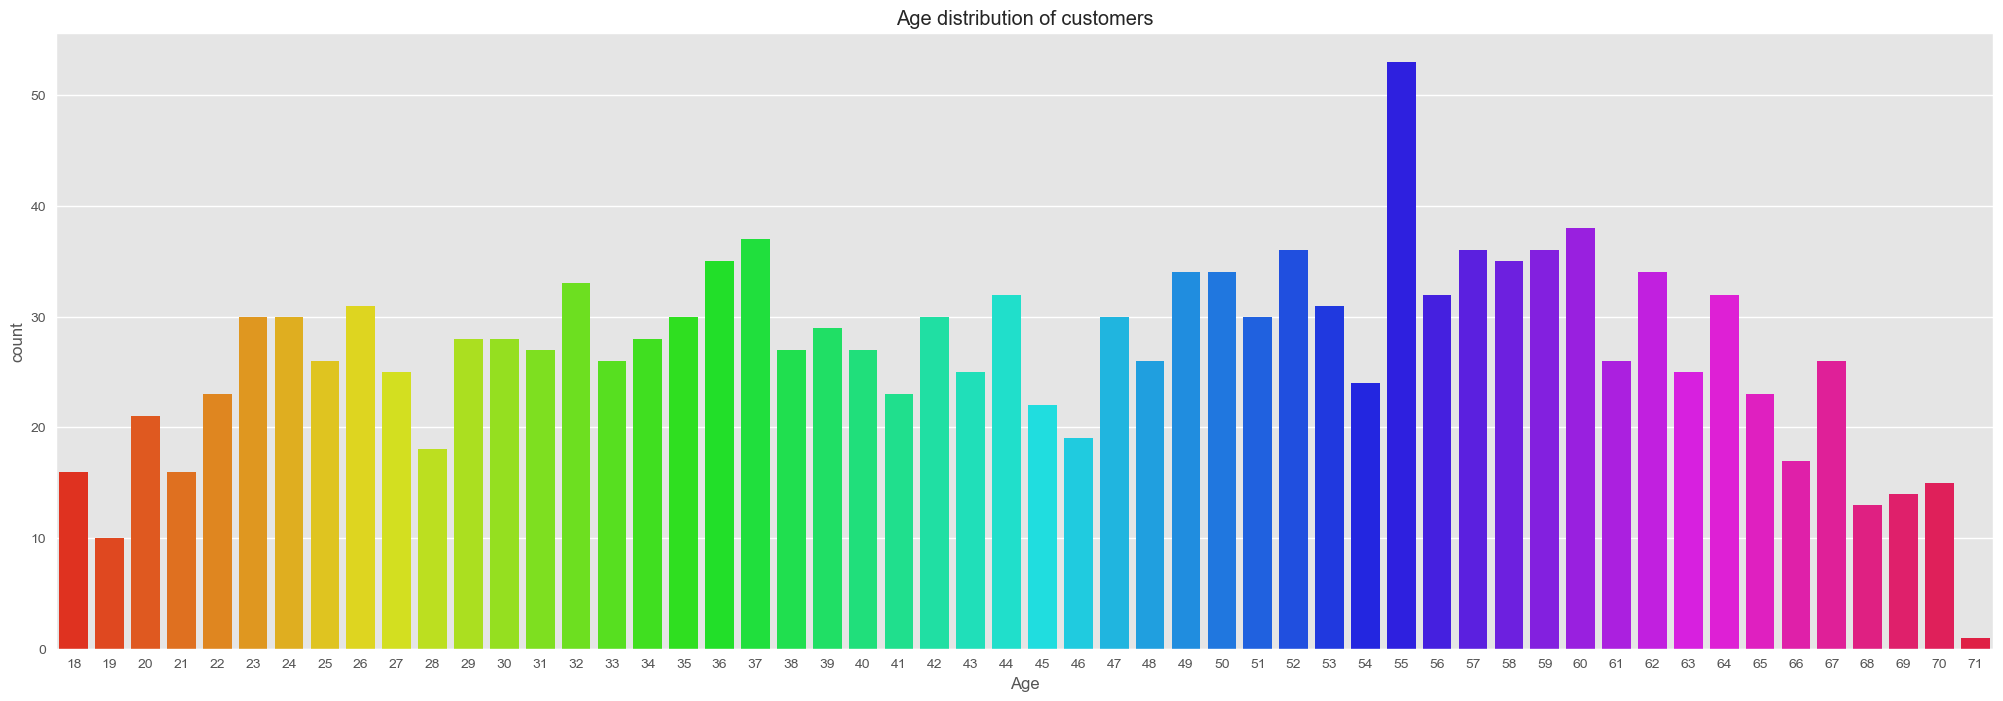

In [93]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (25, 8)
plt.title('Age distribution of customers')

# Create the countplot
f = sns.countplot(x=df['Age'], palette='hsv')

# Add labels to the bars
for container in f.containers:
    ax.bar_label(container)

plt.show()

In [94]:
import pandas as pd

values = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Apply label encoding to categorical columns
df[values] = df[values].apply(lambda x: pd.Categorical(x).codes)

df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


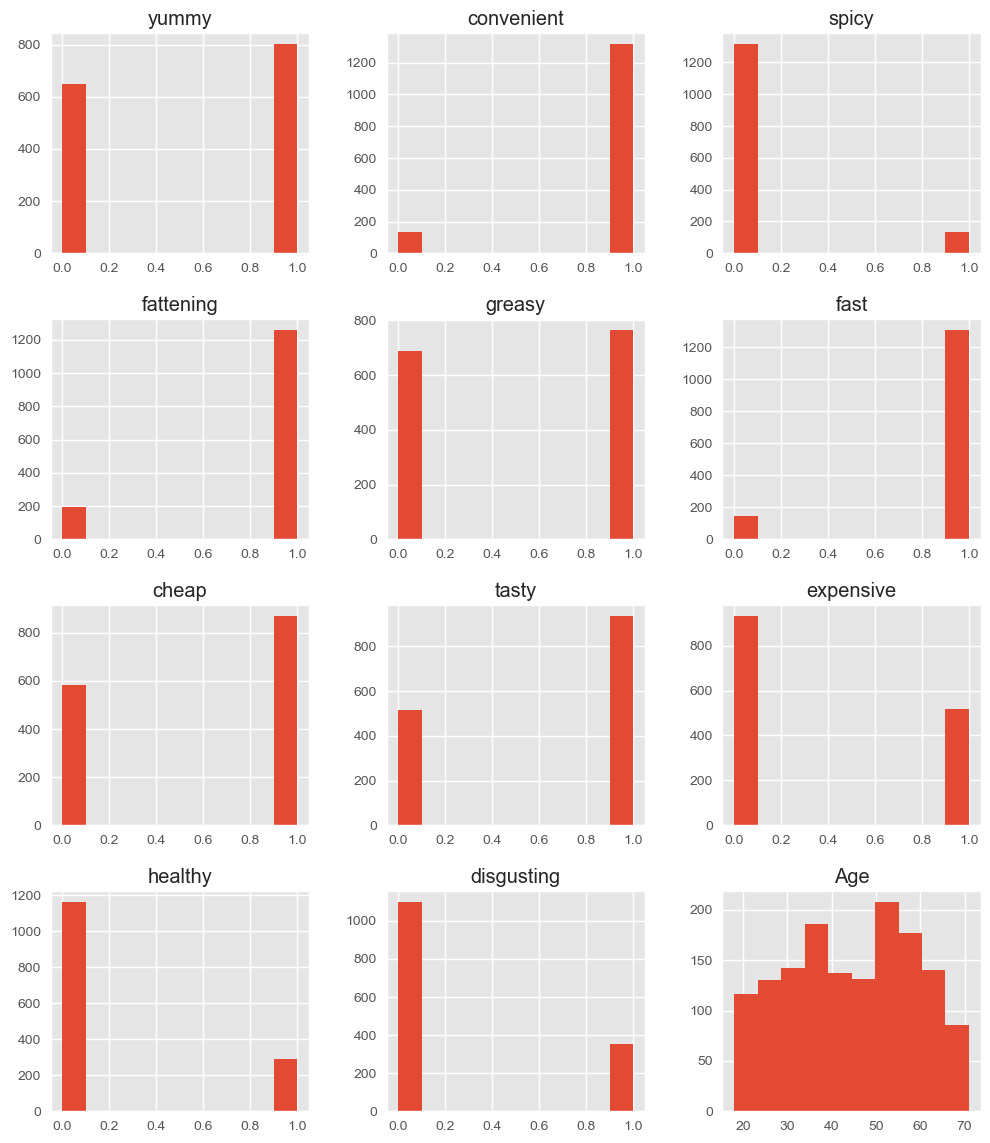

In [95]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [81]:
px.scatter_3d(df,x='yummy',y="Age",z="Gender",color="Gender")

In [96]:
px.scatter_3d(df,x='convenient',y="spicy",z="Gender",color="Gender")

In [98]:
px.scatter_3d(df,x='fattening',y="Age",z="Gender",color="Gender")

In [100]:
px.scatter_3d(df,x='Like',y="Age",z="Gender",color="Gender")

In [24]:
f11 = df.loc[:,values].values
f11

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int8)

In [27]:
#Principal component analysis
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import preprocessing

# Standardize the data
x_scaled = preprocessing.scale(f11)

# Perform PCA
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)

# Create DataFrame for principal components
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pf = pd.DataFrame(data=pc, columns=names)
pf








,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


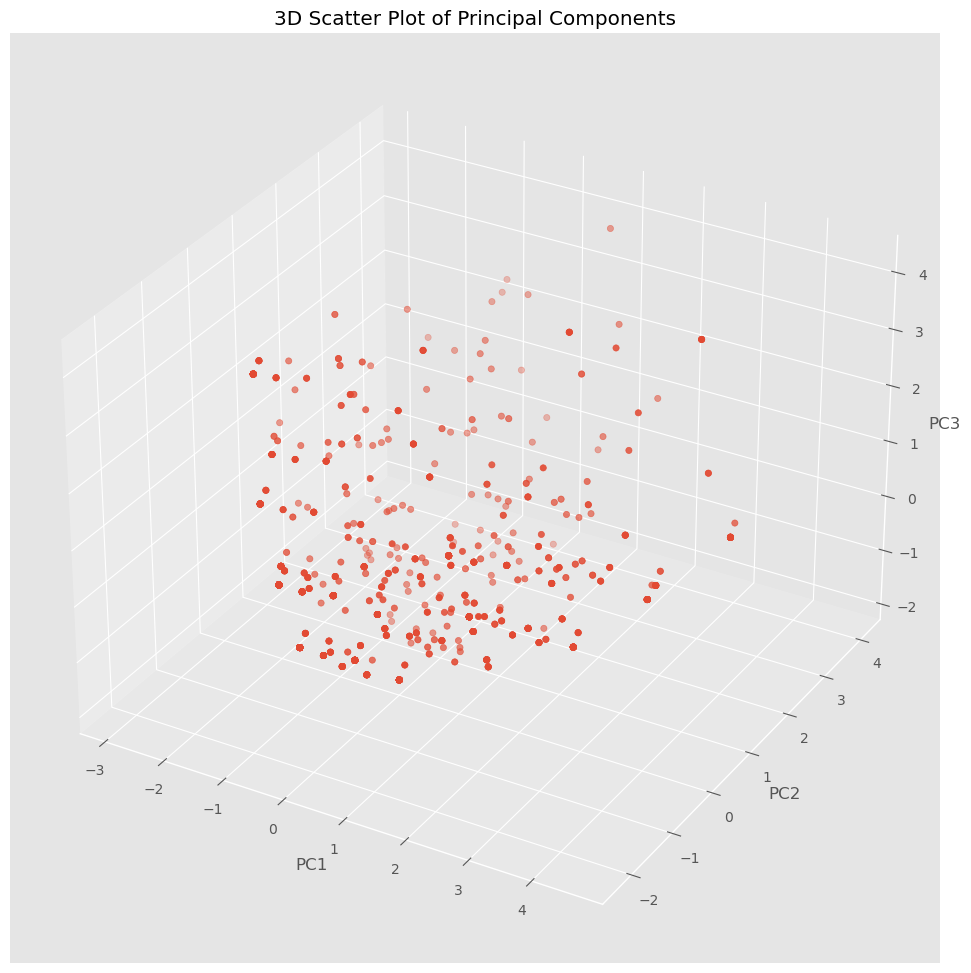

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pf['pc1'], pf['pc2'], pf['pc3'])

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Principal Components')

plt.show()


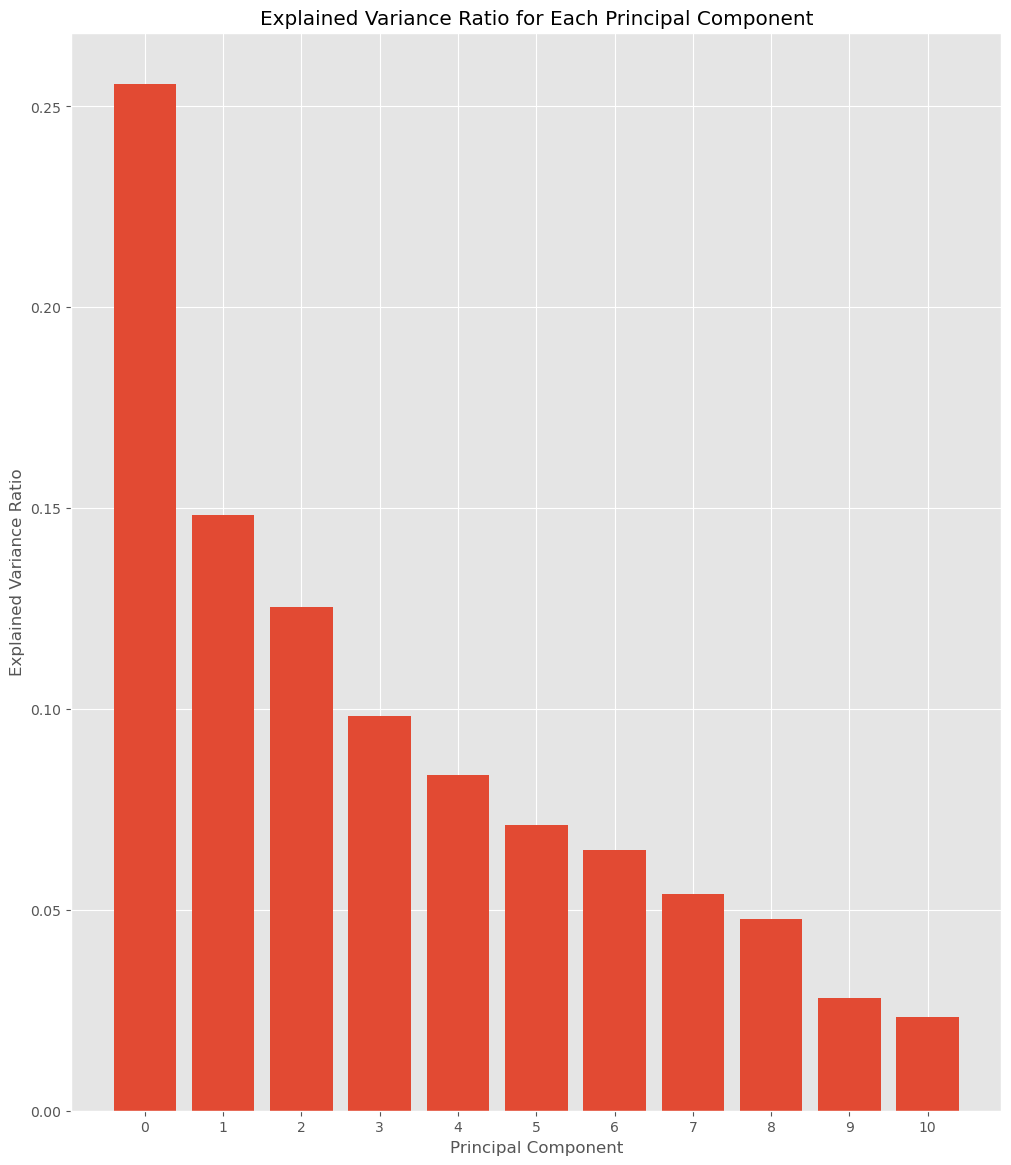

In [29]:
import matplotlib.pyplot as plt

explained_var_ratio = pca.explained_variance_ratio_

# Create a bar plot for explained variance ratio
plt.bar(range(len(explained_var_ratio)), explained_var_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(len(explained_var_ratio)))
plt.show()

In [30]:
import numpy as np

explained_var_cumulative = np.cumsum(pca.explained_variance_ratio_)
print(explained_var_cumulative)

[0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


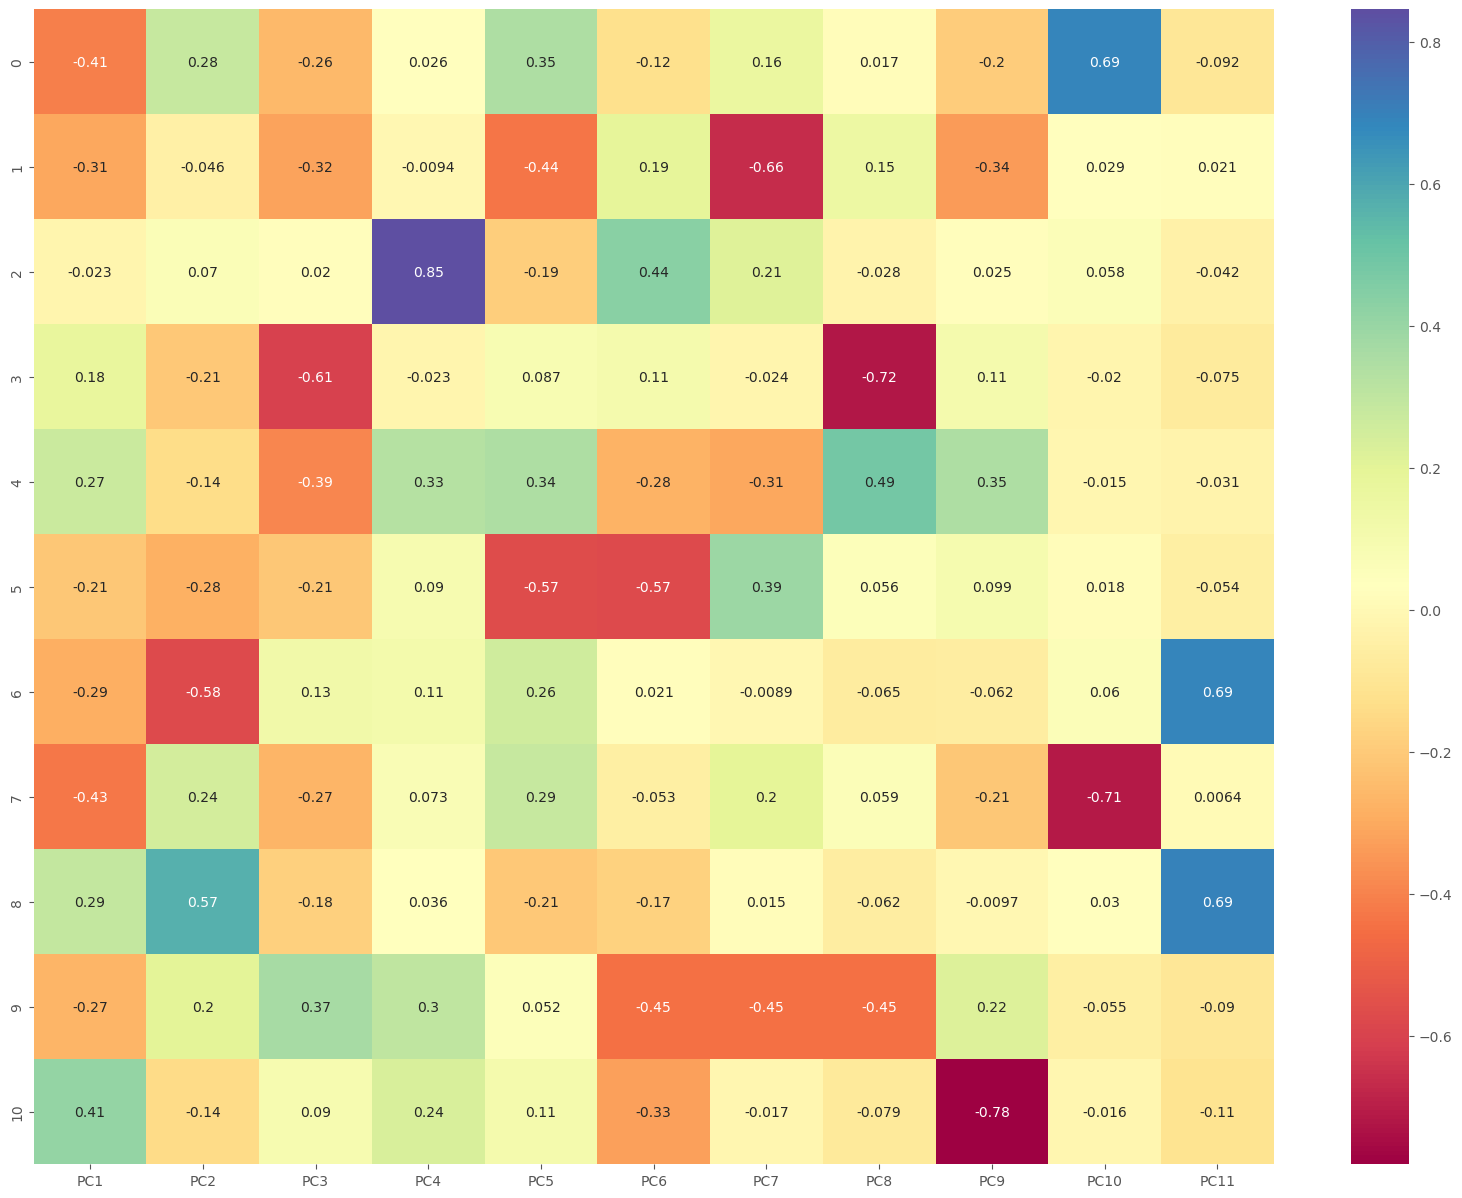

In [45]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

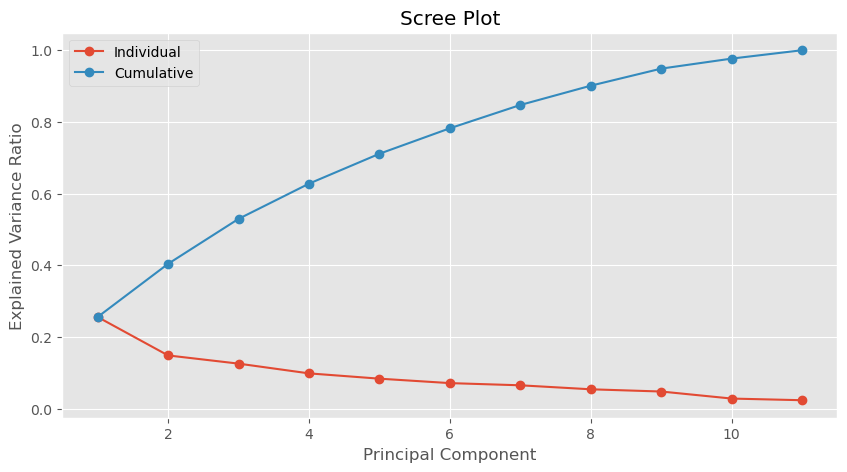

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create the scree plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, num_pc + 1), pca.explained_variance_ratio_, marker='o')
ax.plot(range(1, num_pc + 1), cumulative_var_ratio, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')
ax.legend(['Individual', 'Cumulative'])
plt.show()


IndexError: index 11 is out of bounds for axis 0 with size 11

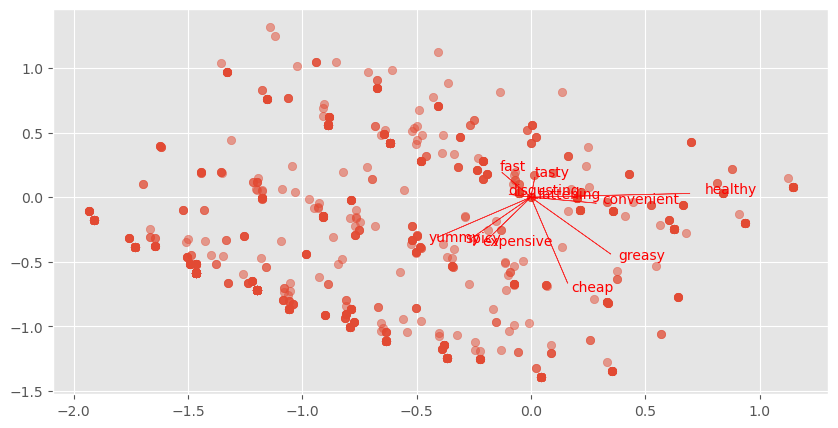

In [48]:
import matplotlib.pyplot as plt

# Calculate PCA scores
pca_scores = pca.transform(f11)

# Create the biplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the scores
ax.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.5)

# Plot the loadings as arrows
for i, var in enumerate(df.columns.values):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.75)
    ax.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='r')

# Set the axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot')

# Show the plot
plt.show()


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



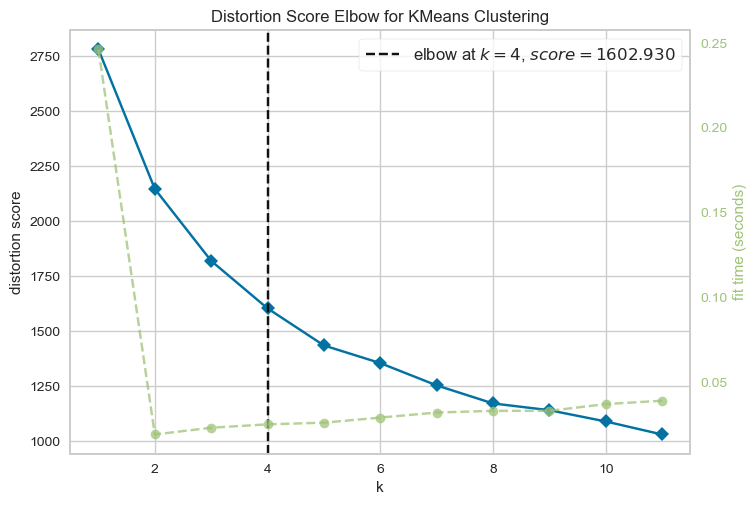

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [56]:
# Create the KMeans model
model = KMeans()

# Instantiate the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 12))

# Fit the visualizer to the data
visualizer.fit(f11)

# Plot the elbow curve
visualizer.show()

# Retrieve the optimal number of clusters
optimal_num_clusters = visualizer.elbow_value_

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(f11)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df_with_clusters = f11.copy()
df_with_clusters['Cluster'] = cluster_labels

# Print the dataframe with cluster assignments
print(df_with_clusters)

In [58]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(f11)

# Add cluster labels to the original dataframe
df['cluster_num'] = kmeans.labels_

# Print the cluster labels assigned to each data point
print("Cluster Labels:")
print(kmeans.labels_)

# Print the within-cluster sum of squares (inertia)
print("Within-Cluster Sum of Squares (Inertia):")
print(kmeans.inertia_)

# Print the number of iterations performed by the k-means algorithm
print("Number of Iterations:")
print(kmeans.n_iter_)

# Print the coordinates of the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Labels:
[2 0 0 ... 0 1 3]
Within-Cluster Sum of Squares (Inertia):
1603.0604440558945
Number of Iterations:
7
Cluster Centers:
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [59]:
from collections import Counter

# Count the occurrences of each cluster label
label_counts = Counter(kmeans.labels_)

# Print the count of data points in each cluster
print("Cluster Label Counts:")
for label, count in label_counts.items():
    print(f"Cluster {label}: {count}")


Cluster Label Counts:
Cluster 2: 304
Cluster 0: 323
Cluster 1: 580
Cluster 3: 246


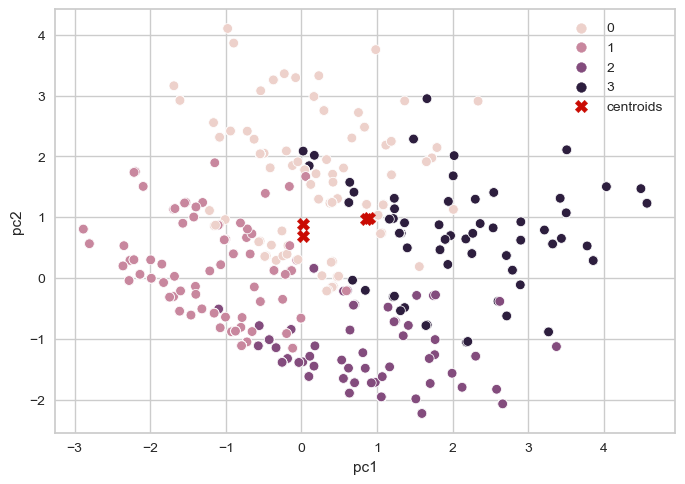

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of the data points
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")

# Add legend
plt.legend()

# Show the plot
plt.show()


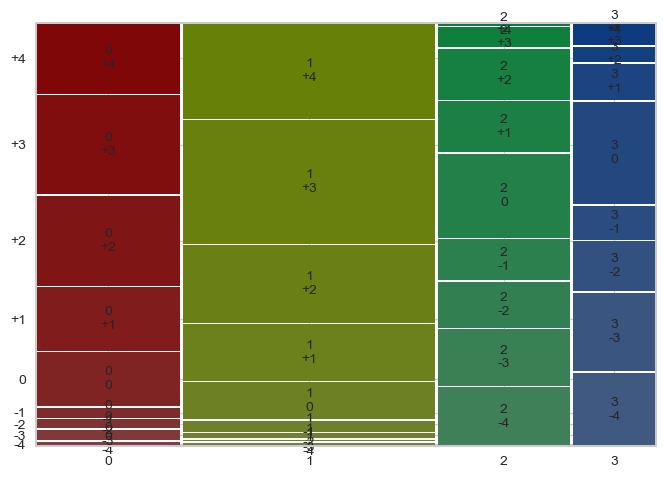

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Calculate the cross-tabulation of cluster_num and Like
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Reorder the columns
crosstab = crosstab[[ '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4']]

# Create a mosaic plot
mosaic(crosstab.stack())

# Show the plot
plt.show()


In [67]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender


Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


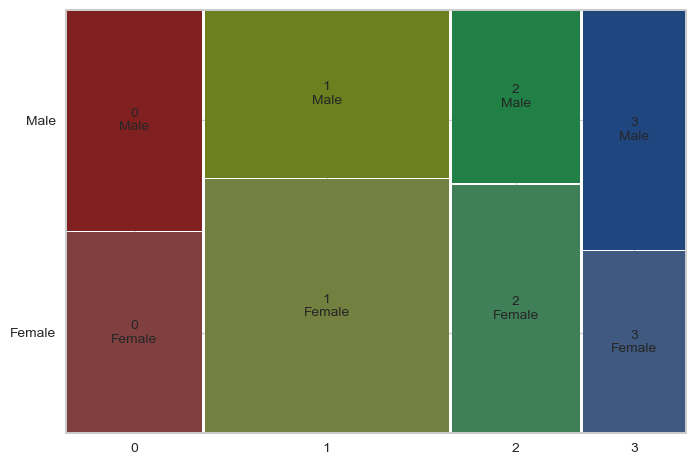

In [66]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the cross-tabulation of cluster_num and Gender
crosstab_gender = pd.crosstab(df['cluster_num'], df['Gender'])

# Create a mosaic plot
mosaic(crosstab_gender.stack())

# Show the plot
plt.show()


<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

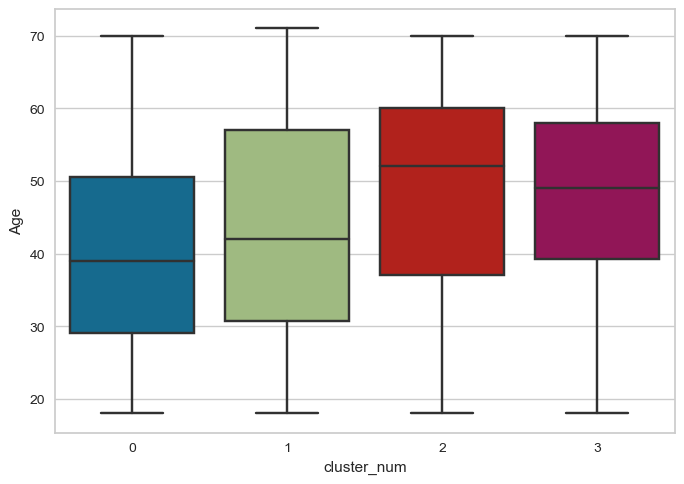

In [68]:
import seaborn as sns

# Create a box plot of Age by cluster_num
sns.boxplot(x="cluster_num", y="Age", data=df)


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'VisitFrequency' variable
df['VisitFrequency'] = encoder.fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit


,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [74]:
#Like

df['Like'] = encoder.fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [76]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the 'Gender' variable
df['Gender'] = encoder.fit_transform(df['Gender'])

# Calculate the mean of 'Gender' by 'cluster_num'
gender = df.groupby('cluster_num')['Gender'].mean().reset_index()
gender.rename(columns={'Gender': 'MeanGender'}, inplace=True)


In [77]:
gender

,cluster_num,MeanGender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [78]:
segment = pd.merge(Gender, Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


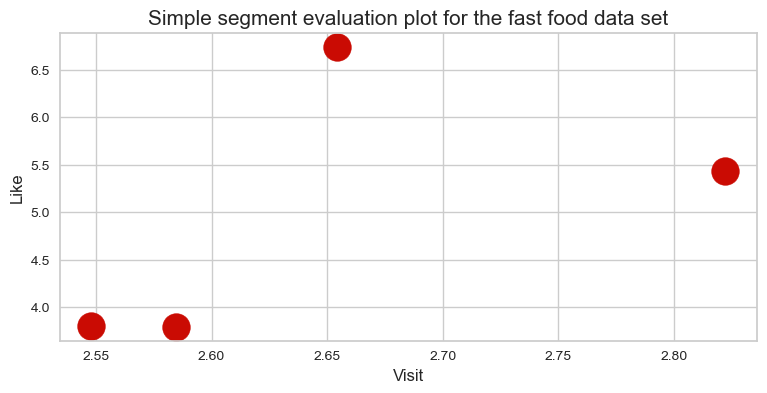

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))
plt.scatter(segment['VisitFrequency'], segment['Like'], s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.show()


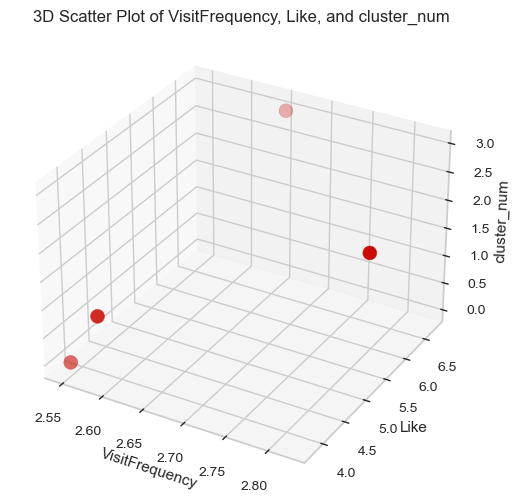

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(segment['VisitFrequency'], segment['Like'], segment['cluster_num'], s=100, c='r')

ax.set_xlabel('VisitFrequency')
ax.set_ylabel('Like')
ax.set_zlabel('cluster_num')

plt.title('3D Scatter Plot of VisitFrequency, Like, and cluster_num')
plt.show()
